# 🎾 Tennis Match Analysis – Notebook 1: Exploratory Data Analysis (EDA)

> 🧠 **Note:** This is a living notebook. We'll continue revisiting it as we develop new questions, insights, or hypotheses. Every good analysis starts with exploration — and ours will evolve as our understanding deepens through modeling and testing.

Welcome! In this notebook, we begin our journey into tennis analytics by exploring historical ATP match data from the 2024 season.

---

## 🧠 What We're Doing

This notebook focuses on understanding the structure and contents of the match data. We'll:

- Load and preview the raw match data
- Investigate key attributes like players, surfaces, and outcomes
- Generate visual insights (e.g. most winning players, surface distribution)
- Highlight interesting angles for future analysis

This serves as a foundation for building models in the next stages of the project.

---



## 📦 Step 1: Import Libraries and Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Load the data
file_path = "../data/raw/atp_matches_2024.csv"  # Update if needed
df = pd.read_csv(file_path)

# Show basic info
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (3076, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


## 🔍 Step 2: Quick Overview and Missing Data

Understanding missing data is also crucial for building trustworthy predictive models — especially if you want to use them for **betting decisions**. For instance:

- Missing match stats could indicate **lower-visibility matches**, where bookmakers might have weaker odds models — potentially creating an edge.
- Understanding when seeding or entry type is missing helps identify **less predictable matches** (e.g., wildcards or qualifiers).
- Consistent player stats like serve percentages and match duration can be **important predictors** of outcome likelihood, stamina, or dominance — all factors in value betting.


In [6]:
print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\nColumns:", df.columns.tolist())


Missing values:
winner_entry    2599
loser_entry     2358
loser_seed      2319
winner_seed     1782
minutes          238
w_SvGms           61
l_SvGms           61
w_bpFaced         60
w_bpSaved         60
w_2ndWon          60
dtype: int64

Columns: ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points']


### 🔎 Insights on Missing Data
- `winner_entry` and `loser_entry`: Often only filled if a player has a special entry status (e.g., wildcard, protected ranking).
- `winner_seed` and `loser_seed`: Missing for unseeded players.
- Match statistics like `minutes`, `w_1stWon`, `l_ace`, etc.: Missing when not recorded, common in early rounds or lower-profile matches.

We'll handle these appropriately during feature engineering in the next notebook.

## 🏆 Step 3: Top Players by Wins

The following bar chart shows the top 10 ATP players by match wins in 2024. This is a simple but powerful indicator of player performance across the season.

From a betting perspective, these players often enter matches as favorites, so understanding their consistency, surface preferences, and any anomalies in performance can help identify:
- Overpriced or underpriced odds
- Value opportunities when strong players are underestimated due to recent losses or surface disadvantages
- Matchups where a less-known but in-form player faces a top-10 opponent

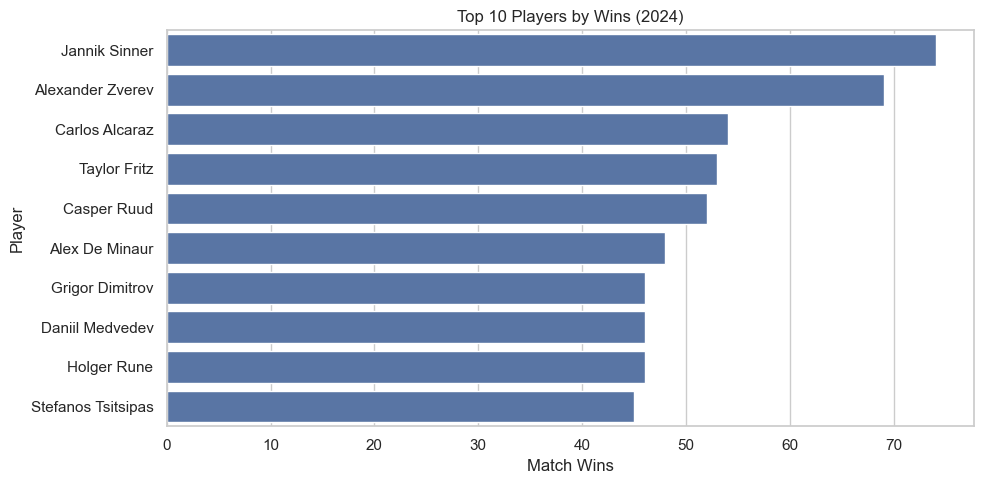

In [7]:
winner_counts = df['winner_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=winner_counts.values, y=winner_counts.index)
plt.title("Top 10 Players by Wins (2024)")
plt.xlabel("Match Wins")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

## 🌍 Step 4: Matches by Surface

The chart below shows the number of ATP matches played on each surface in 2024. As expected, **hard courts dominate** the tour, followed by clay and then grass.

From a betting angle, this matters because:
- Players often have **surface-specific strengths or weaknesses** (e.g., Nadal on clay, Djokovic on hard courts)
- **Model accuracy improves** when you account for surface as a feature
- Betting markets sometimes **misprice players** when they switch surfaces (especially from clay to grass or vice versa)

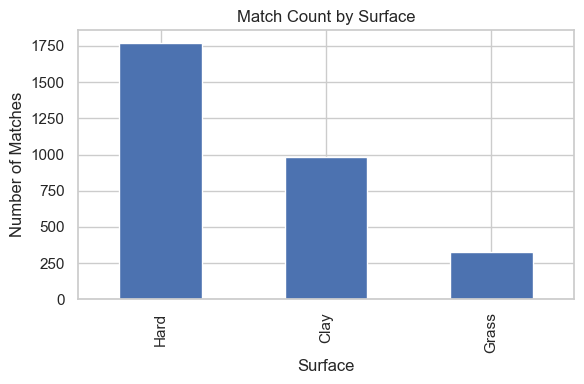

In [9]:
plt.figure(figsize=(6,4))
df['surface'].value_counts().plot(kind='bar')
plt.title("Match Count by Surface")
plt.xlabel("Surface")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

## 🧠 Step 5: Djokovic’s Win Rate by Surface

This chart shows Novak Djokovic's win rate by surface in the 2024 season. Even for a top player, surface effects are clearly visible.

From a betting and modeling standpoint:
- **Grass is his strongest surface** this year, with the highest win rate — useful for modeling matchups in Wimbledon or other grass events.
- **Hard courts** (most common surface) show a slightly lower win rate, which may hint at player fatigue or tighter competition.
- Factoring in player-specific surface performance can increase the **predictive accuracy** of your models and help identify **mispriced odds** in betting markets.

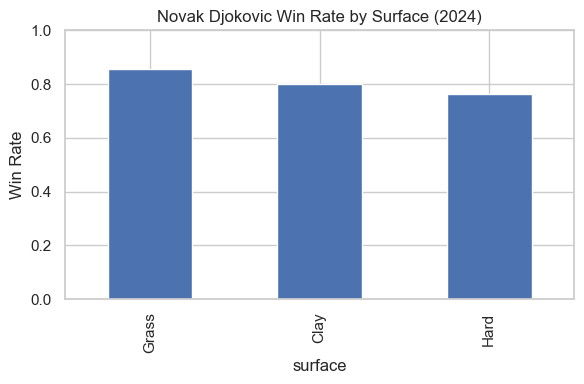

In [12]:
djoko_matches = df[(df['winner_name'] == 'Novak Djokovic') | (df['loser_name'] == 'Novak Djokovic')].copy()
djoko_matches['won'] = djoko_matches['winner_name'] == 'Novak Djokovic'

win_rate_surface = djoko_matches.groupby('surface')['won'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
win_rate_surface.plot(kind='bar')
plt.title("Novak Djokovic Win Rate by Surface (2024)")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## 📌 What’s Next?

In the next notebook, we’ll:
- Clean up missing data
- Engineer useful features (ranking difference, player form, etc.)
- Start preparing our data for model training

This will bring us closer to building a machine learning model that predicts match outcomes!